In [388]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency 
from scipy.stats import chisquare 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [389]:
# read medical data clean 
df = pd.read_csv('medical_clean.csv')
df.head()

,Unnamed: 0,CaseOrder,ReAdmis,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,...,Reflux_esophagitis,Asthma,Services,Initial_days,Hours of treatment,CT Scan,Intravenous,MRI,Emergency Admission,Observation Admission
0,0,1,0,6,Emergency Admission,1,0,2,0,1,...,0,1,Blood Work,10.585770,3,0,0,0,1,0
1,1,2,0,4,Emergency Admission,1,0,3,1,0,...,1,0,Intravenous,15.129562,4,0,1,0,1,0
2,2,3,0,4,Elective Admission,1,0,2,1,0,...,0,0,Blood Work,4.772177,4,0,0,0,0,0
3,3,4,0,4,Elective Admission,0,1,2,0,1,...,1,1,Blood Work,1.714879,5,0,0,0,0,0
4,4,5,0,5,Elective Admission,0,0,1,0,0,...,0,0,CT Scan,1.254807,3,1,0,0,0,0


In [390]:
#rename unspecified columns with information given 
rename_cols={
    'Item1':'Timely admission',
    'Item2':'Timely treatment',
    'Item3':'Timely visits',
    'Item4':'Realiability',
    'Item5':'Options',
    'Item6':'Hours of treatment',
    'Item7':'Courteous staff',
    'Item8':'Evidence of active listening from doctor'}
df.rename(columns=rename_cols,inplace=True)
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'ReAdmis', 'Doc_visits', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'Hours of treatment', 'CT Scan', 'Intravenous', 'MRI',
       'Emergency Admission', 'Observation Admission'],
      dtype='object')

In [391]:
# check for any null values to clean up 
df.isna().sum()

Unnamed: 0               0
CaseOrder                0
ReAdmis                  0
Doc_visits               0
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                  0
Allergic_rhinitis        0
Reflux_esophagitis       0
Asthma                   0
Services                 0
Initial_days             0
Hours of treatment       0
CT Scan                  0
Intravenous              0
MRI                      0
Emergency Admission      0
Observation Admission    0
dtype: int64

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CaseOrder                                 10000 non-null  int64  
 1   Customer_id                               10000 non-null  object 
 2   Interaction                               10000 non-null  object 
 3   UID                                       10000 non-null  object 
 4   City                                      10000 non-null  object 
 5   State                                     10000 non-null  object 
 6   County                                    10000 non-null  object 
 7   Zip                                       10000 non-null  int64  
 8   Lat                                       10000 non-null  float64
 9   Lng                                       10000 non-null  float64
 10  Population                         

In [297]:
#drop columns not important for statistical analysis and verify columns have been dropped 
df = df.drop(columns=['Customer_id','Interaction','UID', 'City', 'State', 'County','Zip','Lat','Lng','Population','Area','TimeZone','Job','Children','Age','Income','Marital','Gender','TotalCharge','Additional_charges','Options','Courteous staff','Realiability','Timely admission','Timely treatment','Timely visits','Evidence of active listening from doctor','Soft_drink','Full_meals_eaten','VitD_levels','vitD_supp'])

In [298]:
#make sure columns are actually dropped
df.head(5)

,CaseOrder,ReAdmis,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Hours of treatment
0,1,No,6,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3
1,2,No,4,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4
2,3,No,4,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,4
3,4,No,4,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,5
4,5,No,5,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,3


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   ReAdmis             10000 non-null  object 
 2   Doc_visits          10000 non-null  int64  
 3   Initial_admin       10000 non-null  object 
 4   HighBlood           10000 non-null  object 
 5   Stroke              10000 non-null  object 
 6   Complication_risk   10000 non-null  object 
 7   Overweight          10000 non-null  object 
 8   Arthritis           10000 non-null  object 
 9   Diabetes            10000 non-null  object 
 10  Hyperlipidemia      10000 non-null  object 
 11  BackPain            10000 non-null  object 
 12  Anxiety             10000 non-null  object 
 13  Allergic_rhinitis   10000 non-null  object 
 14  Reflux_esophagitis  10000 non-null  object 
 15  Asthma              10000 non-null  object 
 16  Servi

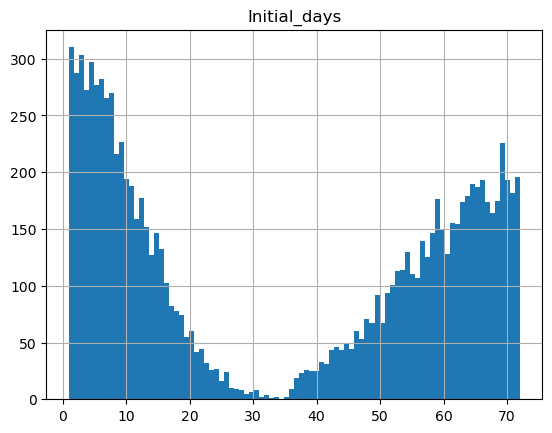

In [305]:
#Univariate statistics with target variable initial days
df.hist('Initial_days', bins=90)
plt.show()

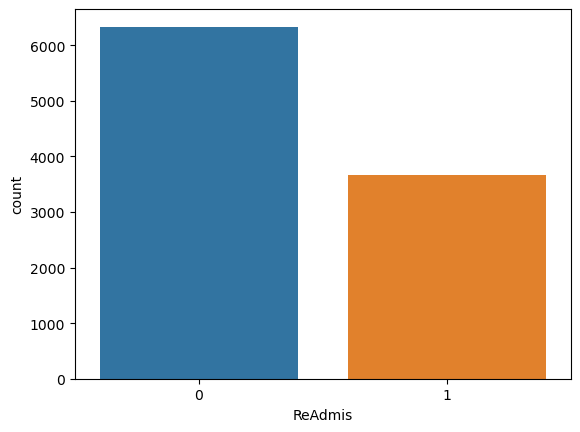

In [306]:
sns.countplot(df, x='ReAdmis')
plt.show()

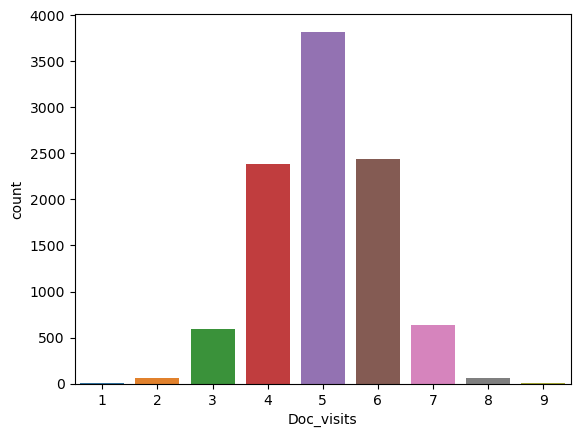

In [307]:
sns.countplot(df, x='Doc_visits')
plt.show()

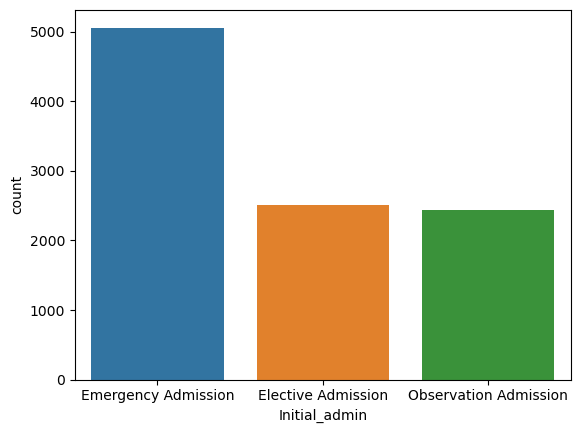

In [308]:
sns.countplot(df, x='Initial_admin')
plt.show()

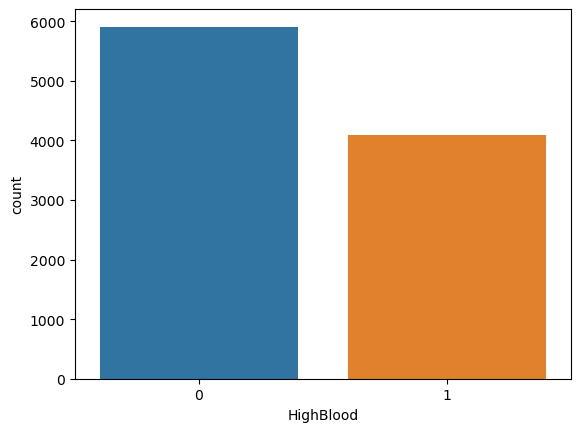

In [309]:
sns.countplot(df, x='HighBlood')
plt.show()

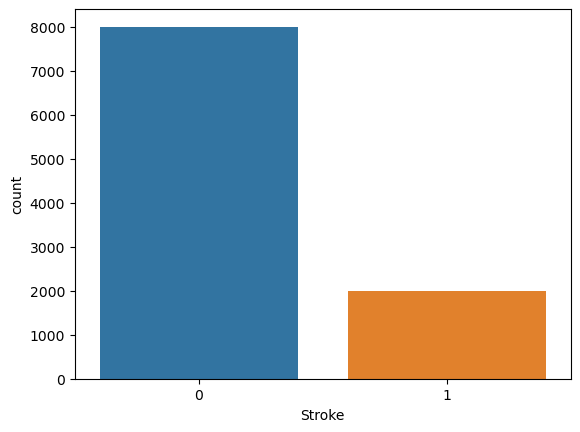

In [310]:
sns.countplot(df, x='Stroke')
plt.show()

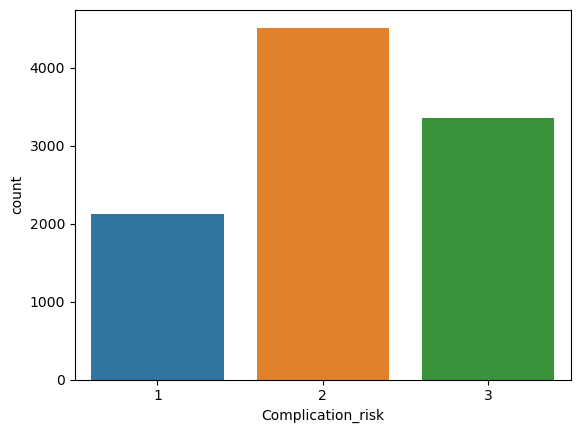

In [311]:
sns.countplot(df, x='Complication_risk')
plt.show()

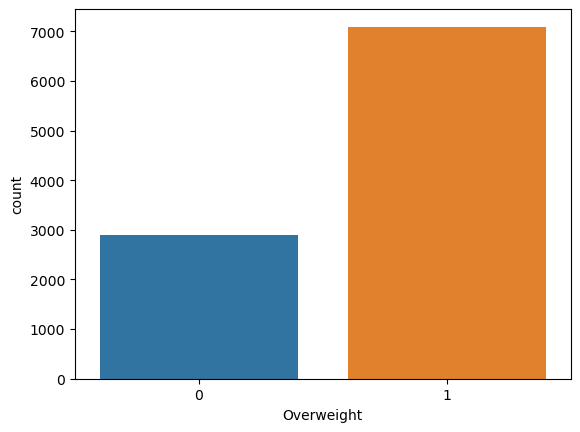

In [312]:
sns.countplot(df, x='Overweight')
plt.show()

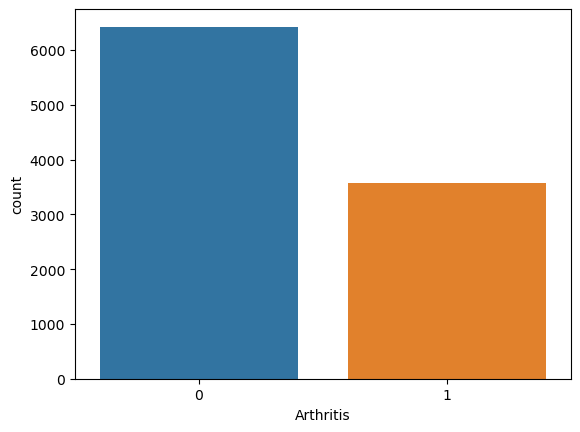

In [313]:
sns.countplot(df, x='Arthritis')
plt.show()

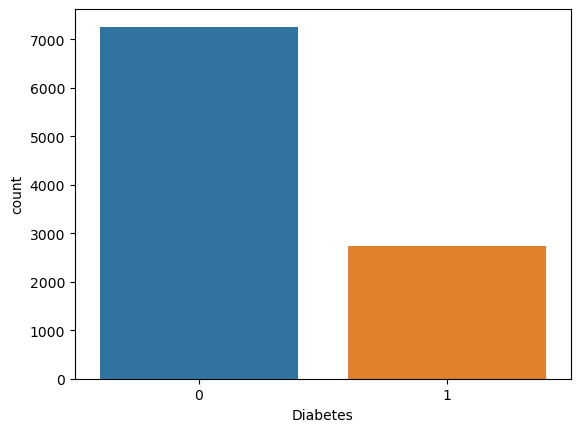

In [314]:
sns.countplot(df, x='Diabetes')
plt.show()

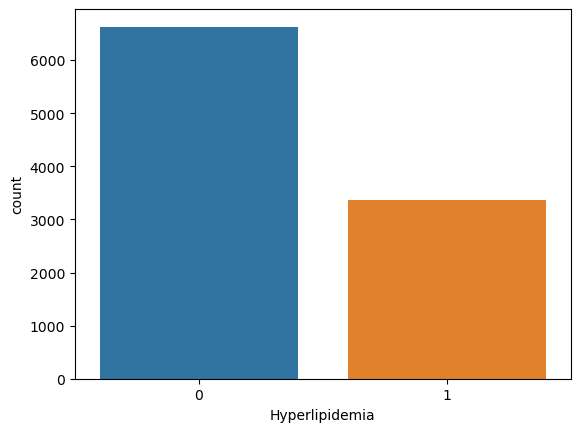

In [315]:
sns.countplot(df, x='Hyperlipidemia')
plt.show()

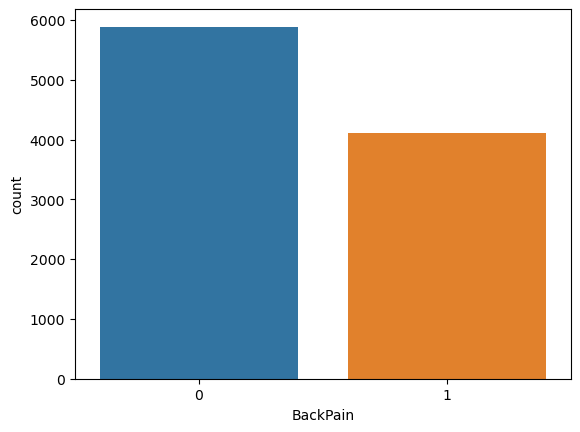

In [316]:
sns.countplot(df, x='BackPain')
plt.show()

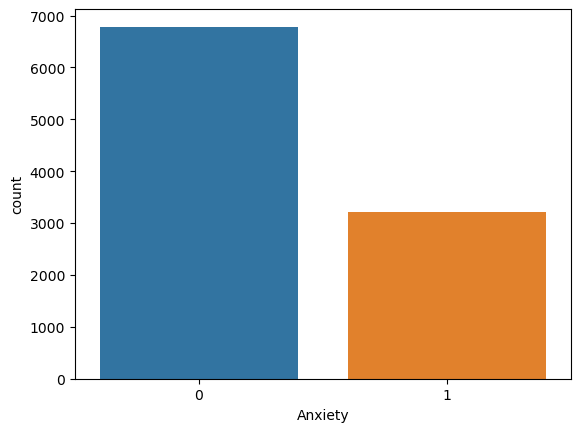

In [317]:
sns.countplot(df, x='Anxiety')
plt.show()

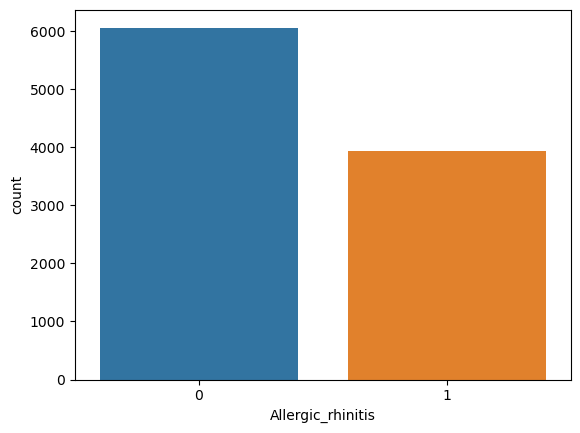

In [318]:
sns.countplot(df, x='Allergic_rhinitis')
plt.show()

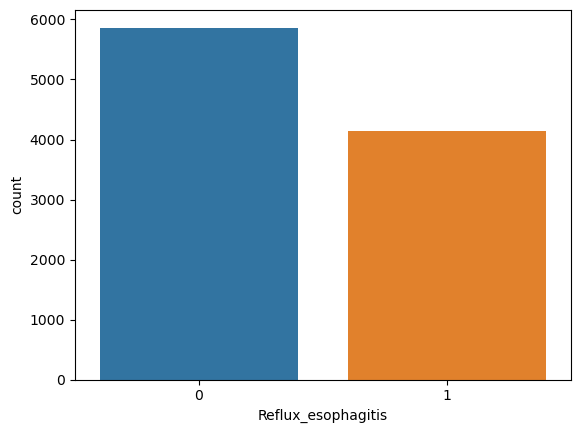

In [319]:
sns.countplot(df, x='Reflux_esophagitis')
plt.show()

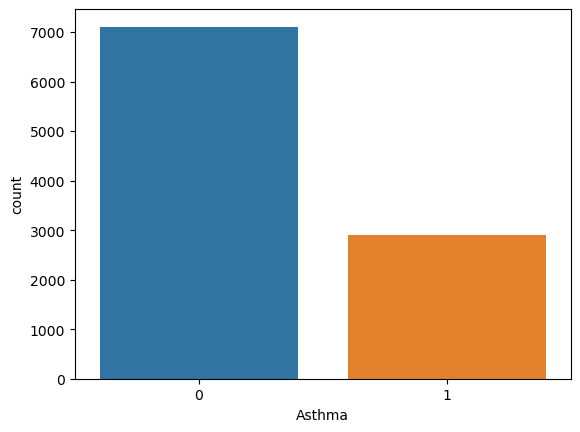

In [320]:
sns.countplot(df, x='Asthma')
plt.show()

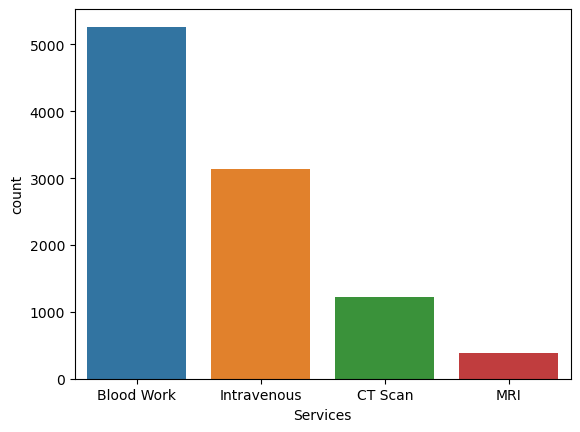

In [321]:
sns.countplot(df, x='Services')
plt.show()

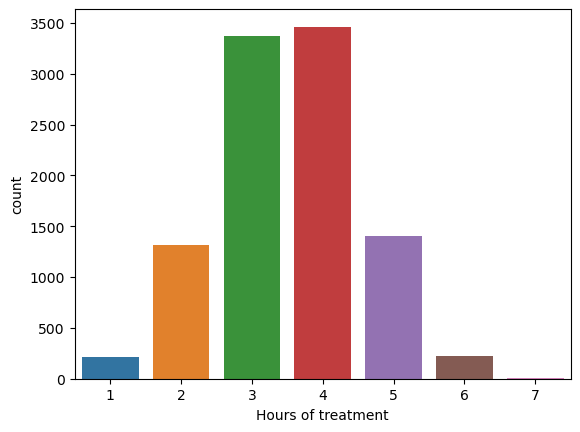

In [322]:
sns.countplot(df, x='Hours of treatment')
plt.show()

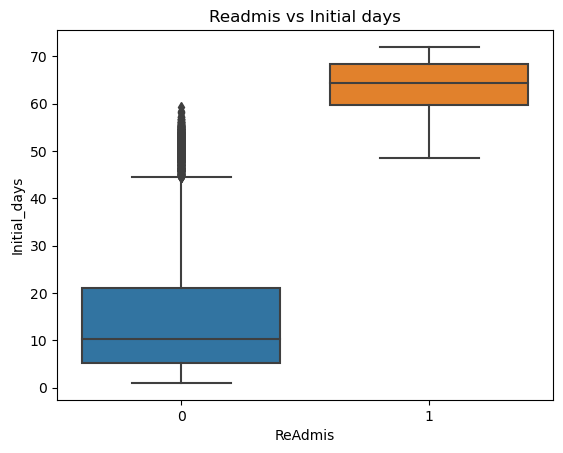

In [323]:
sns.boxplot(df, x='ReAdmis', y='Initial_days')
plt.title('Readmis vs Initial days')
plt.show()

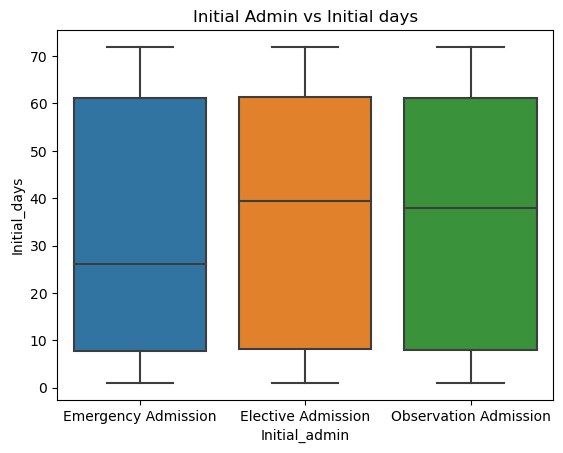

In [324]:
sns.boxplot(df, x='Initial_admin', y='Initial_days')
plt.title('Initial Admin vs Initial days')
plt.show()

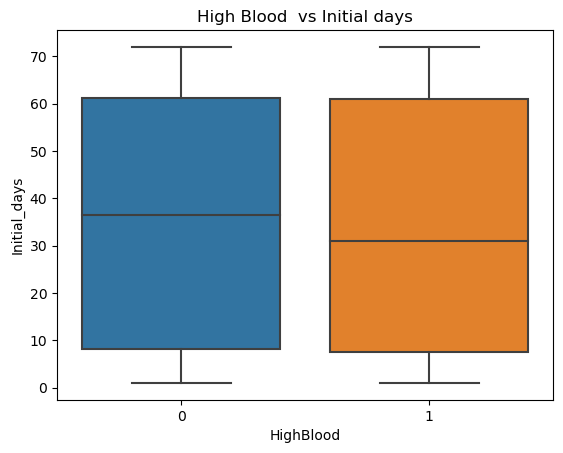

In [325]:
sns.boxplot(df, x='HighBlood', y='Initial_days')
plt.title('High Blood  vs Initial days')
plt.show()

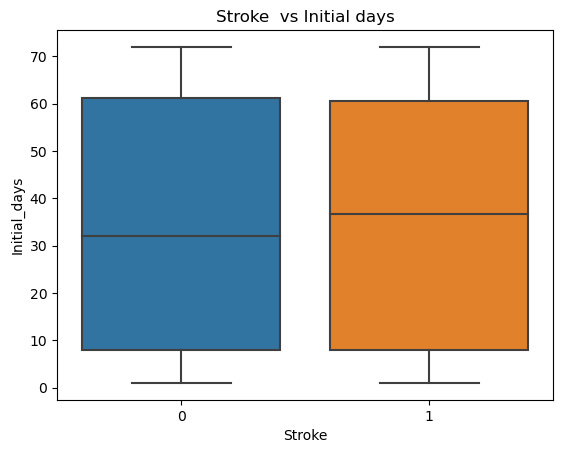

In [326]:
sns.boxplot(df, x='Stroke', y='Initial_days')
plt.title('Stroke  vs Initial days')
plt.show()

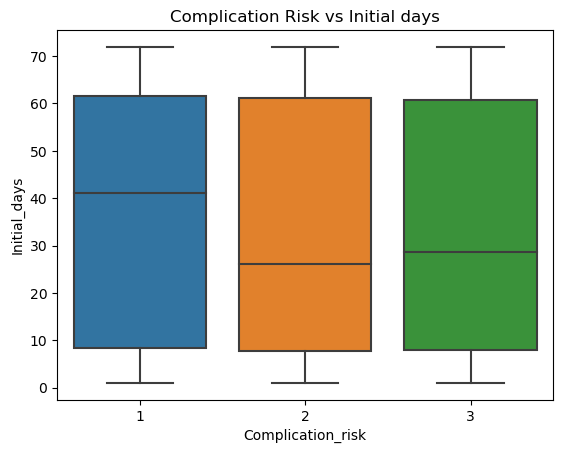

In [327]:
sns.boxplot(df, x='Complication_risk', y='Initial_days')
plt.title('Complication Risk vs Initial days')
plt.show()

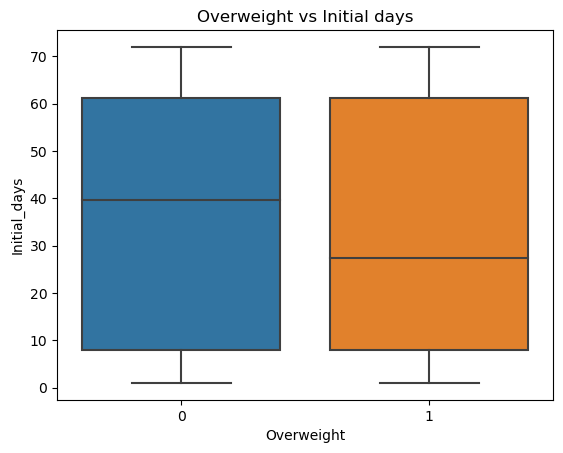

In [328]:
sns.boxplot(df, x='Overweight', y='Initial_days')
plt.title('Overweight vs Initial days')
plt.show()

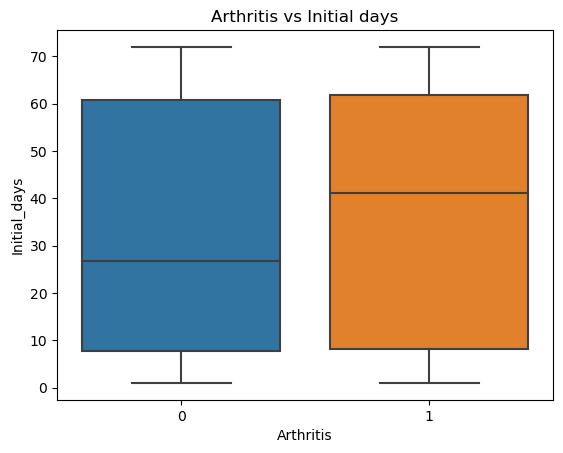

In [329]:
sns.boxplot(df, x='Arthritis', y='Initial_days')
plt.title('Arthritis vs Initial days')
plt.show()

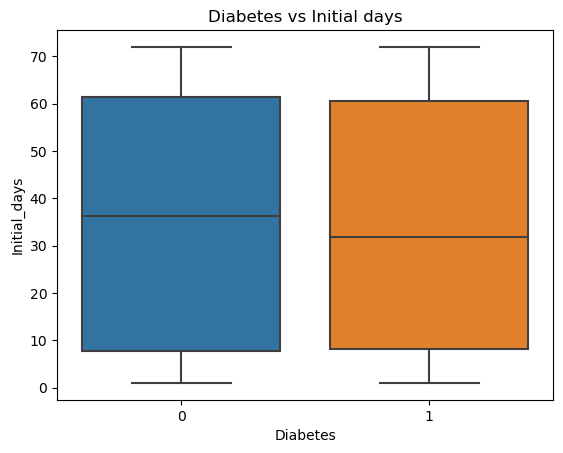

In [330]:
sns.boxplot(df, x='Diabetes', y='Initial_days')
plt.title('Diabetes vs Initial days')
plt.show()

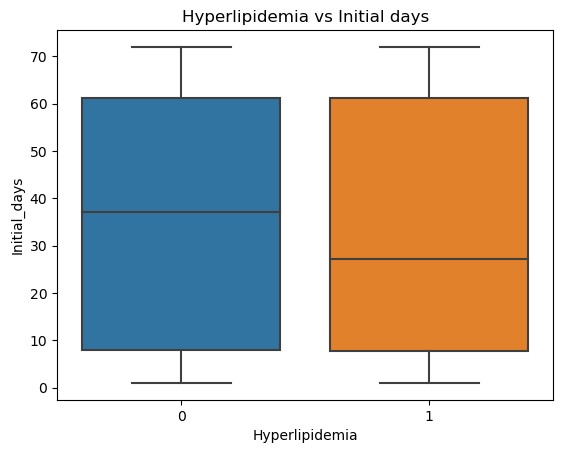

In [331]:
sns.boxplot(df, x='Hyperlipidemia', y='Initial_days')
plt.title('Hyperlipidemia vs Initial days')
plt.show()

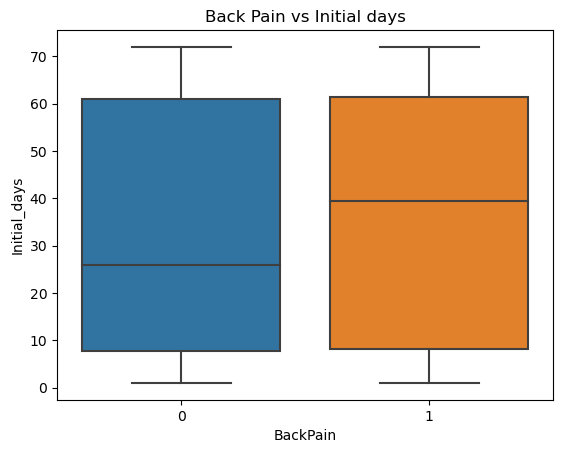

In [332]:
sns.boxplot(df, x='BackPain', y='Initial_days')
plt.title('Back Pain vs Initial days')
plt.show()

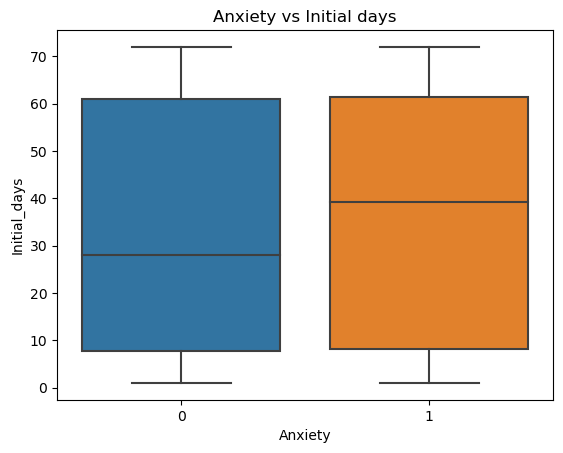

In [65]:
sns.boxplot(df, x='Anxiety', y='Initial_days')
plt.title('Anxiety vs Initial days')
plt.show()

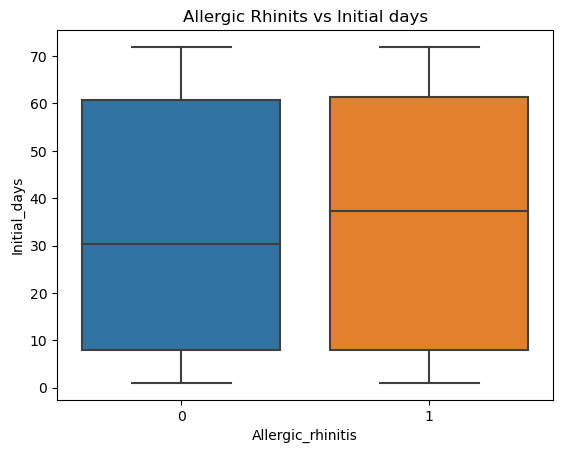

In [333]:
sns.boxplot(df, x='Allergic_rhinitis', y='Initial_days')
plt.title('Allergic Rhinits vs Initial days')
plt.show()

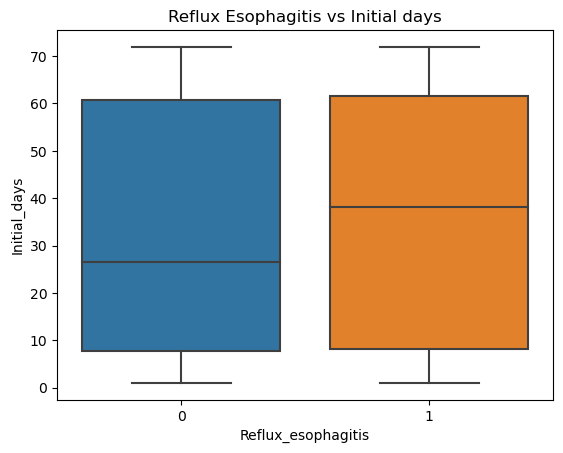

In [334]:
sns.boxplot(df, x='Reflux_esophagitis', y='Initial_days')
plt.title('Reflux Esophagitis vs Initial days')
plt.show()

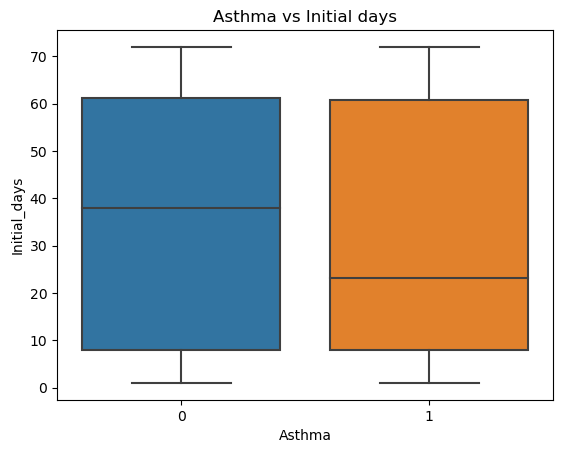

In [335]:
sns.boxplot(df, x='Asthma', y='Initial_days')
plt.title('Asthma vs Initial days')
plt.show()

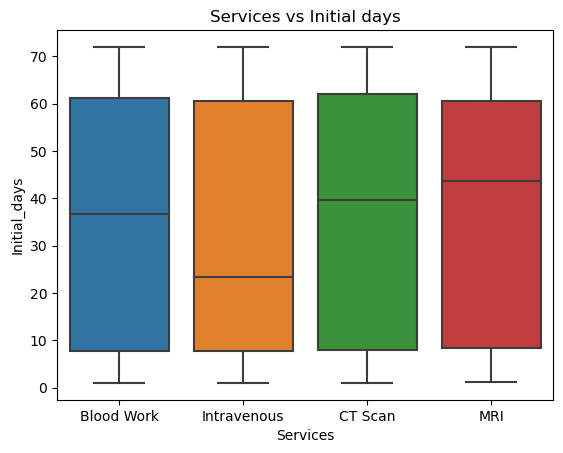

In [336]:
sns.boxplot(df, x='Services', y='Initial_days')
plt.title('Services vs Initial days')
plt.show()

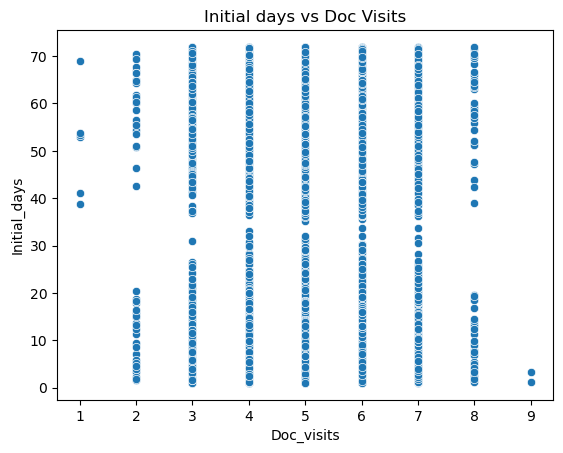

In [337]:
#Bivariate statistics with Continuous variables 
sns.scatterplot(x='Doc_visits', y='Initial_days', data = df)
plt.title('Initial days vs Doc Visits')
plt.show()

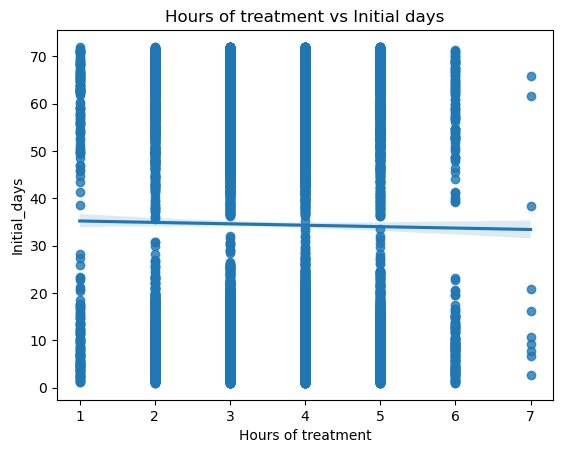

In [339]:
sns.regplot(x='Hours of treatment', y='Initial_days', data=df)
plt.title('Hours of treatment vs Initial days')
plt.show()

In [392]:
df['ReAdmis'].replace(('Yes','No'),(1,0), inplace=True)
df['HighBlood'].replace(('Yes','No'),(1,0), inplace=True)
df['Stroke'].replace(('Yes','No'),(1,0), inplace=True)
df['Overweight'].replace(('Yes','No'),(1,0), inplace=True)
df['Arthritis'].replace(('Yes','No'),(1,0), inplace=True)
df['Diabetes'].replace(('Yes','No'),(1,0), inplace=True)
df['Hyperlipidemia'].replace(('Yes','No'),(1,0), inplace=True)
df['BackPain'].replace(('Yes','No'),(1,0), inplace=True)
df['Anxiety'].replace(('Yes','No'),(1,0), inplace=True)
df['Allergic_rhinitis'].replace(('Yes','No'),(1,0),inplace=True)
df['Reflux_esophagitis'].replace(('Yes','No'),(1,0), inplace =True)
df['Asthma'].replace(('Yes','No'),(1,0),inplace= True)
df['Complication_risk'].replace(('Low','Medium','High'),(1,2,3),inplace=True)
df['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI' ], [1,2,3,4], inplace=True)
df['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [3,2,1], inplace=True)

In [301]:
df[['ReAdmis','HighBlood', 'Stroke', 'Overweight','Arthritis']].describe()

,ReAdmis,HighBlood,Stroke,Overweight,Arthritis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.366900,0.409000,0.199300,0.709400,0.357400
std,0.481983,0.491674,0.399494,0.454062,0.479258
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
df[['Complication_risk','Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis','Reflux_esophagitis','Asthma']].describe()

,Complication_risk,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2.123300,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930
std,0.730172,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [303]:
df[['Initial_days','Doc_visits','Hours of treatment']].describe()

,Initial_days,Doc_visits,Hours of treatment
count,10000.000000,10000.000000,10000.000000
mean,34.455299,5.012200,3.522500
std,26.309341,1.045734,1.032376
min,1.001981,1.000000,1.000000
25%,7.896215,4.000000,3.000000
50%,35.836244,5.000000,4.000000
75%,61.161020,6.000000,4.000000
max,71.981490,9.000000,7.000000


In [ ]:
df[['Services','Initial_admin']].describe()

,Services,Initial_admin
count,10000.000000,10000.000000
mean,1.672000,2.262400
std,0.832758,0.825115
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,3.000000
max,4.000000,3.000000


In [396]:
df['Services'].replace([1,2,3,4 ], ['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], inplace=True)
df['Initial_admin'].replace([3,2,1], ['Emergency Admission', 'Elective Admission', 'Observation Admission'], inplace=True)

In [397]:
#Get dummies for services categorical data
services_dummies = pd.get_dummies(df.Services)
services_dummies.drop('Blood Work', axis=1, inplace= True)
services_dummies

,CT Scan,Intravenous,MRI
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,1,0,0
9997,0,1,0
9998,0,0,0


In [341]:
#Get dummies for initial admin categorical data
initial_admin_dummies = pd.get_dummies(df.Initial_admin)
initial_admin_dummies.drop('Elective Admission', axis=1, inplace=True)
initial_admin_dummies

,Emergency Admission,Observation Admission
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,1,0
9996,0,0
9997,0,0
9998,1,0


In [342]:
#Add dummies to data frame 
df = pd.concat([df,services_dummies,initial_admin_dummies], axis='columns')
df

,CaseOrder,ReAdmis,Doc_visits,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,...,Reflux_esophagitis,Asthma,Services,Initial_days,Hours of treatment,CT Scan,Intravenous,MRI,Emergency Admission,Observation Admission
0,1,0,6,Emergency Admission,1,0,2,0,1,1,...,0,1,Blood Work,10.585770,3,0,0,0,1,0
1,2,0,4,Emergency Admission,1,0,3,1,0,0,...,1,0,Intravenous,15.129562,4,0,1,0,1,0
2,3,0,4,Elective Admission,1,0,2,1,0,1,...,0,0,Blood Work,4.772177,4,0,0,0,0,0
3,4,0,4,Elective Admission,0,1,2,0,1,0,...,1,1,Blood Work,1.714879,5,0,0,0,0,0
4,5,0,5,Elective Admission,0,0,1,0,0,0,...,0,0,CT Scan,1.254807,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0,4,Emergency Admission,1,0,2,0,0,0,...,1,0,Intravenous,51.561220,3,0,1,0,1,0
9996,9997,1,5,Elective Admission,1,0,2,1,1,1,...,0,1,CT Scan,68.668240,3,1,0,0,0,0
9997,9998,1,4,Elective Admission,1,0,3,1,0,0,...,0,0,Intravenous,70.154180,2,0,1,0,0,0
9998,9999,1,5,Emergency Admission,0,0,2,1,0,0,...,0,0,Blood Work,63.356900,3,0,0,0,1,0


In [343]:
#Review data from dummies 
df[['Emergency Admission','Observation Admission','CT Scan','Intravenous','MRI']].describe()

,Emergency Admission,Observation Admission,CT Scan,Intravenous,MRI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.506000,0.243600,0.122500,0.313000,0.038000
std,0.499989,0.429276,0.327879,0.463738,0.191206
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [398]:
#Drop the original columns
df = df.drop(['Services','Initial_admin','Hours of treatment'], axis='columns')
print(df)

      Unnamed: 0  CaseOrder  ReAdmis  Doc_visits  HighBlood  Stroke  \
0              0          1        0           6          1       0   
1              1          2        0           4          1       0   
2              2          3        0           4          1       0   
3              3          4        0           4          0       1   
4              4          5        0           5          0       0   
...          ...        ...      ...         ...        ...     ...   
9995        9995       9996        0           4          1       0   
9996        9996       9997        1           5          1       0   
9997        9997       9998        1           4          1       0   
9998        9998       9999        1           5          0       0   
9999        9999      10000        1           5          0       0   

      Complication_risk  Overweight  Arthritis  Diabetes  ...  Anxiety  \
0                     2           0          1         1  ...        1   

In [385]:
df = df.to_csv('medical_data_clean.csv')

In [347]:
#define predictor and response variables
y = df['Initial_days']
x = df[['ReAdmis','Doc_visits','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma', 'Emergency Admission','Observation Admission',
       'CT Scan', 'Intravenous','MRI']]

#add constant to predictor variables
x = sm.add_constant(x)

#linear regression model
initial_model = sm.OLS(y,x).fit()

#view model
print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1552.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:56:08   Log-Likelihood:                -40425.
No. Observations:               10000   AIC:                         8.089e+04
Df Residuals:                    9982   BIC:                         8.102e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    19.04

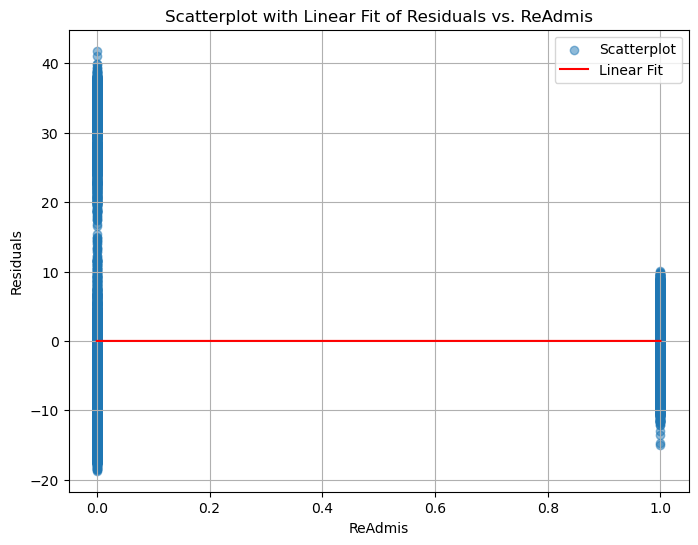

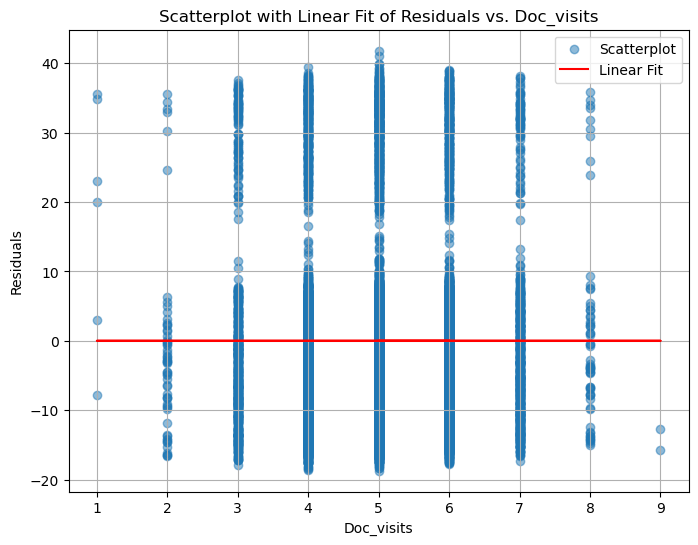

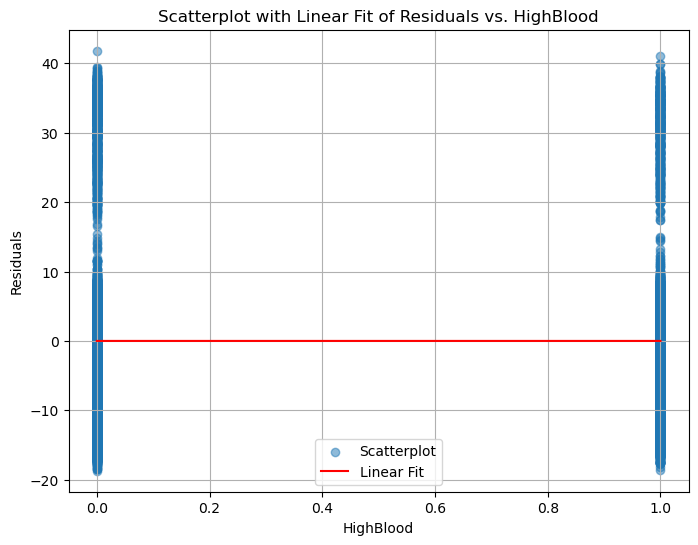

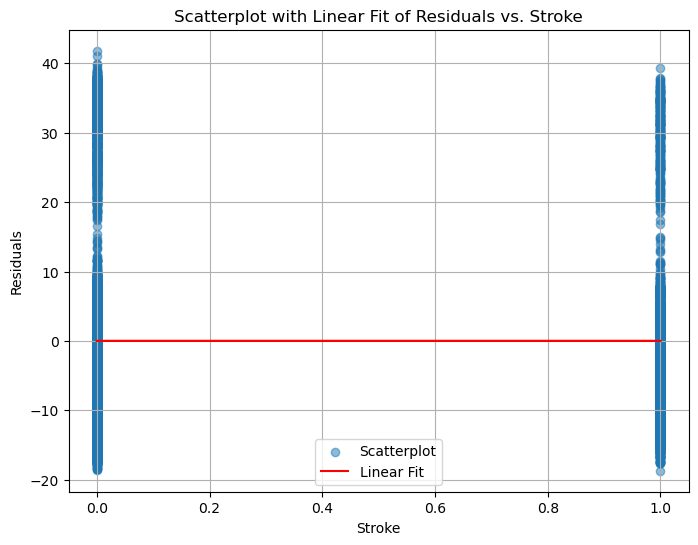

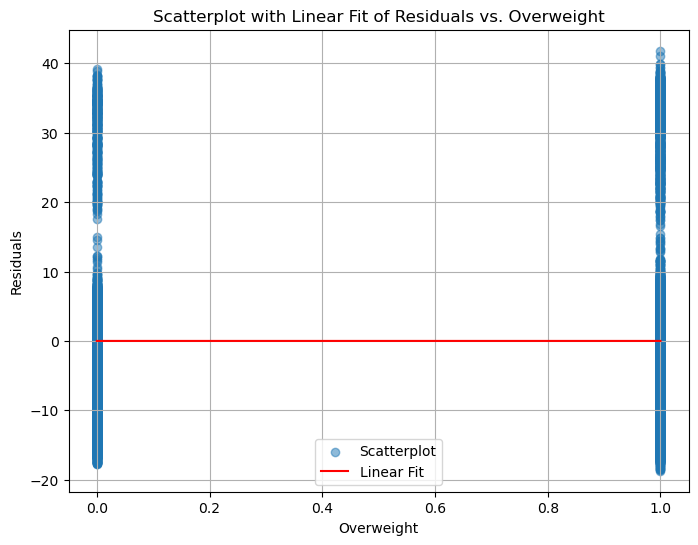

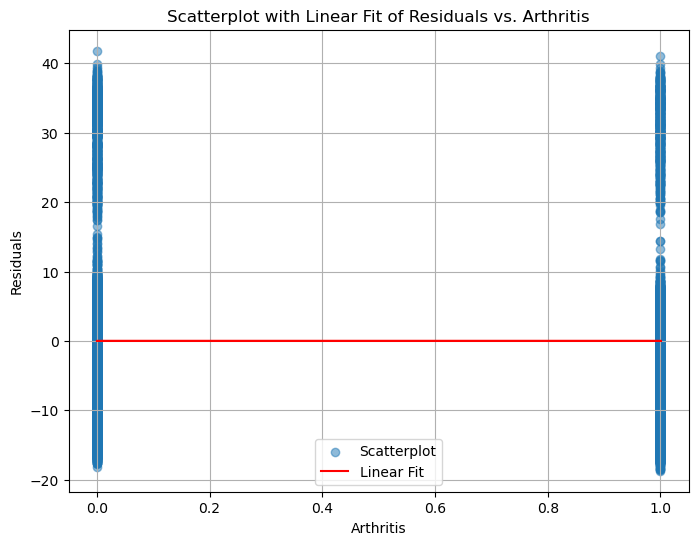

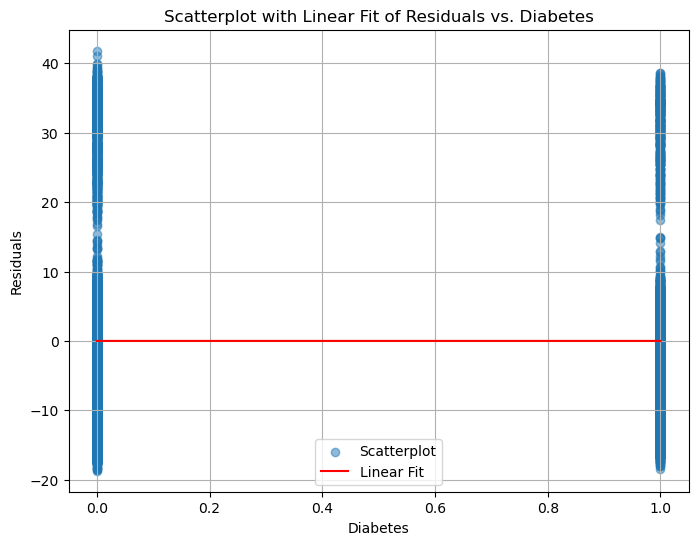

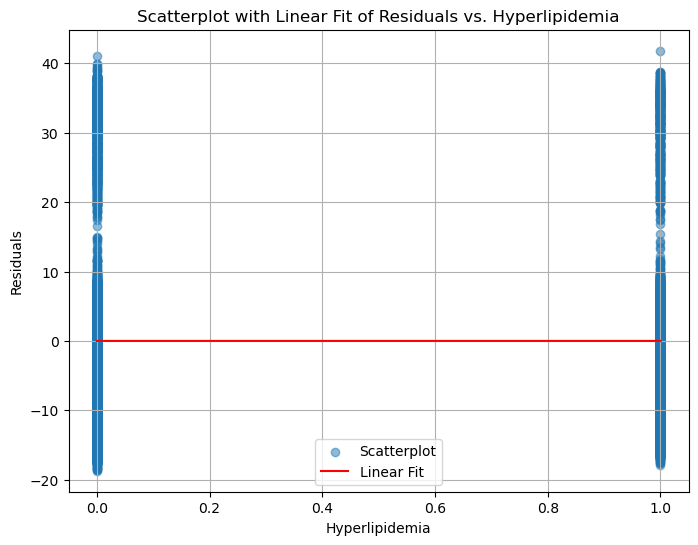

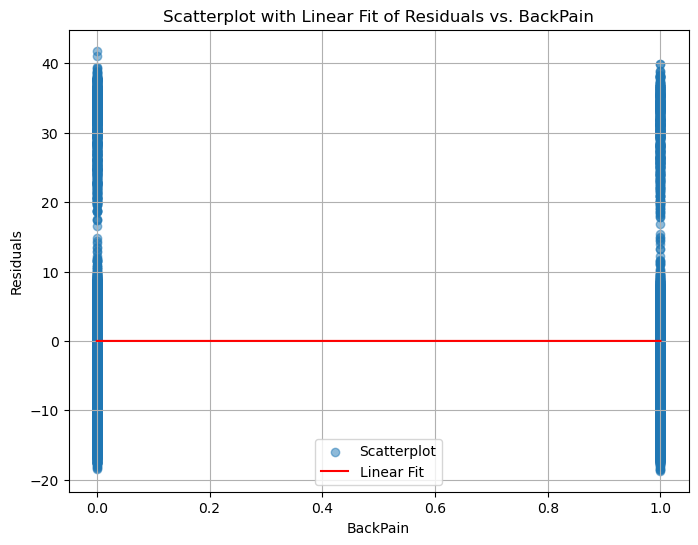

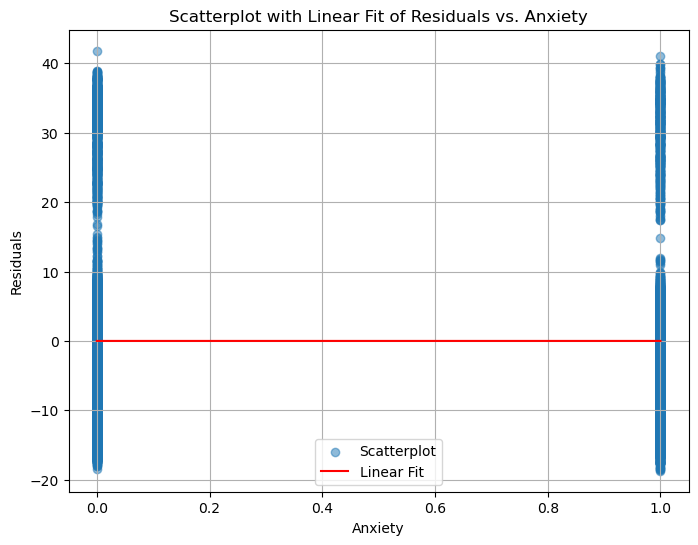

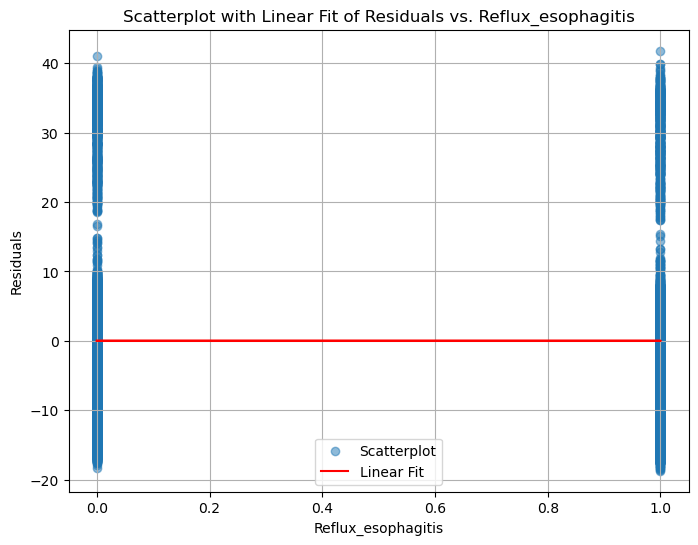

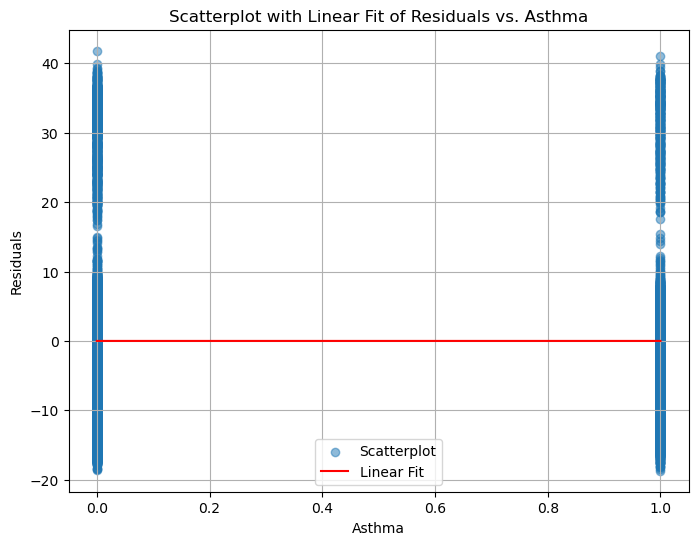

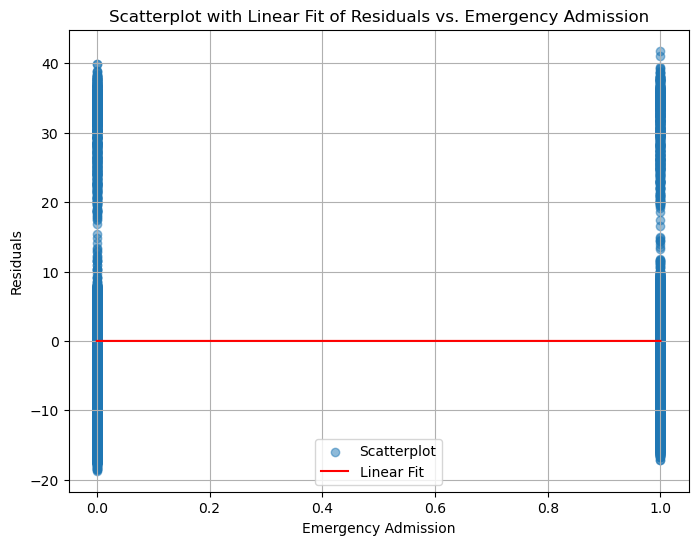

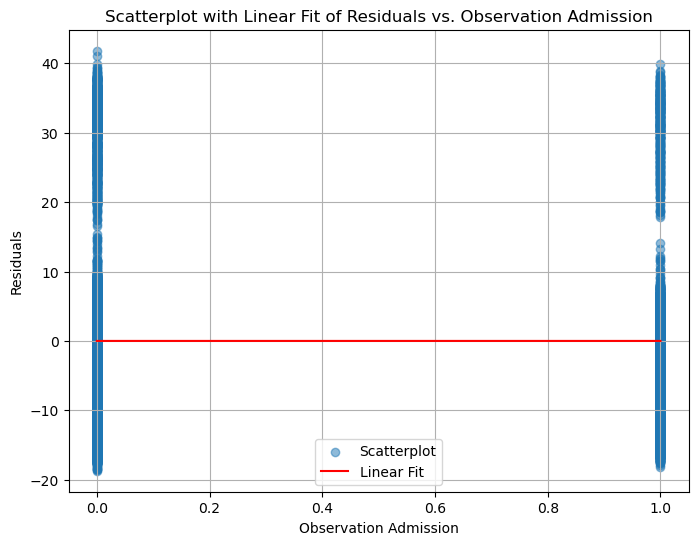

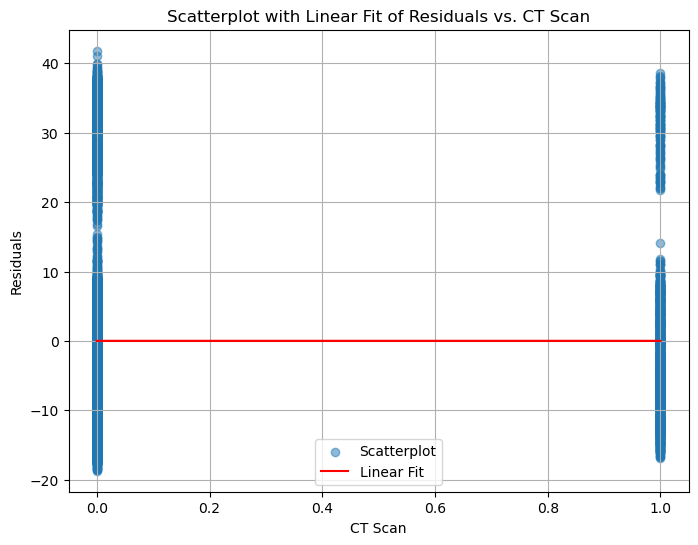

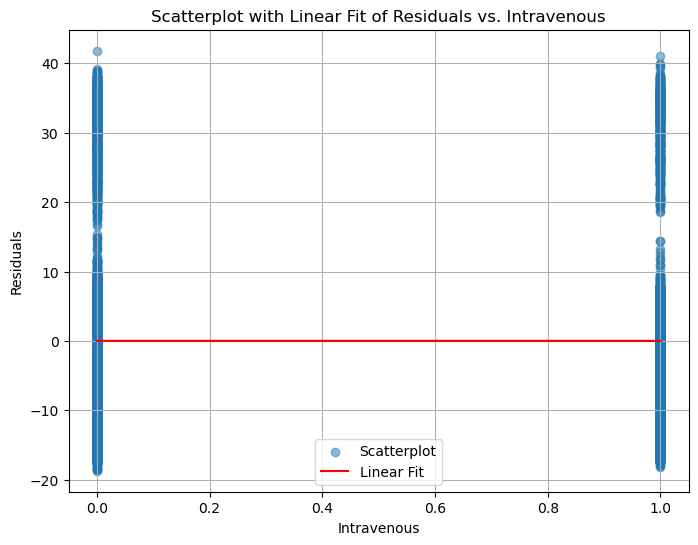

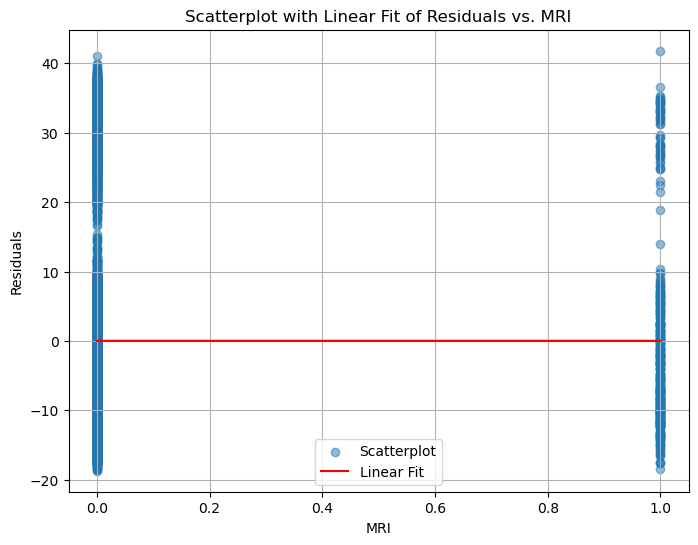

In [350]:
#Check for linearity assumption
residuals = initial_model.resid
independent_variables = df[['ReAdmis','Doc_visits','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma', 'Emergency Admission','Observation Admission',
       'CT Scan', 'Intravenous','MRI']]

for variable in independent_variables:
    # Create a scatterplot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[variable], residuals, alpha=0.5, label="Scatterplot")

    # Fit a linear regression line
    coef = np.polyfit(df[variable], residuals, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(df[variable], poly1d_fn(df[variable]), 'r', label="Linear Fit")

    # Add labels and a legend
    plt.xlabel(variable)
    plt.ylabel('Residuals')
    plt.title(f'Scatterplot with Linear Fit of Residuals vs. {variable}')
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [351]:
#Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = df[['ReAdmis','Doc_visits','HighBlood','Stroke','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety','Reflux_esophagitis','Asthma', 'Emergency Admission','Observation Admission',
       'CT Scan', 'Intravenous','MRI']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0                 ReAdmis  1.557783
1              Doc_visits  8.524422
2               HighBlood  1.668613
3                  Stroke  1.239754
4              Overweight  3.226957
5               Arthritis  1.533923
6                Diabetes  1.367538
7          Hyperlipidemia  1.480099
8                BackPain  1.675497
9                 Anxiety  1.455275
10     Reflux_esophagitis  1.669338
11                 Asthma  1.389718
12    Emergency Admission  2.818964
13  Observation Admission  1.881776
14                CT Scan  1.226452
15            Intravenous  1.558697
16                    MRI  1.067918


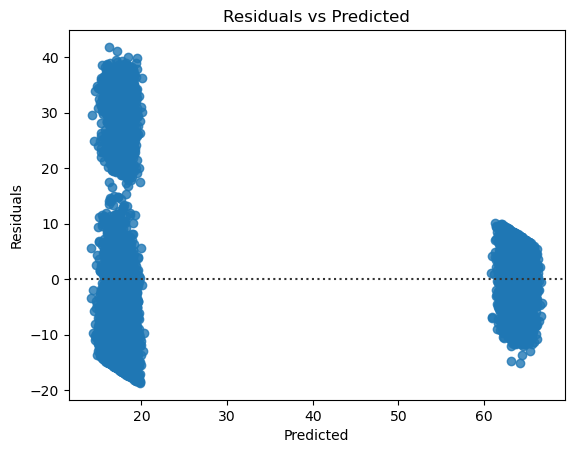

In [365]:
#Chceck for homoscedasticity
predicted = initial_model.predict(x)
residuals = initial_model.resid
sns.residplot(x=predicted, y=residuals, data=initial_model)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of residuals')

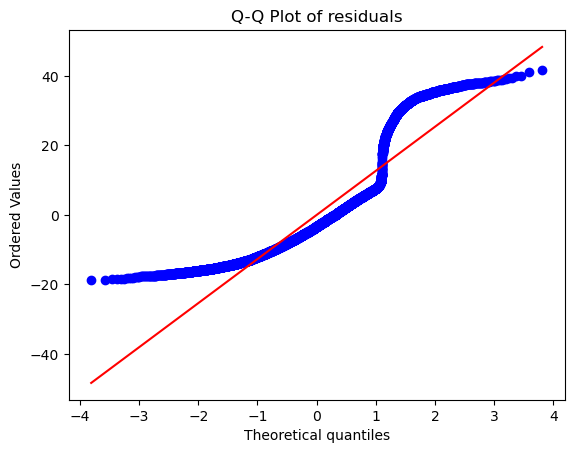

In [353]:
#QQ plot of residuals for normality 
stats.probplot(initial_model.resid, dist='norm', plot=plt)
plt.title("Q-Q Plot of residuals")

In [354]:
#Durbin watson signifies autocorrelation in the residuals from a regression analysis
dw = durbin_watson(initial_model.resid)
print(dw)

1.270541805522172


In [355]:
#calculate residual standard error to determine how well it fits the dataset, the smaller the better
RES = np.sqrt(initial_model.scale)
print('Residual Standard Error:', RES)

Residual Standard Error: 13.796647823773498


In [356]:
#model evaluation metric 
r2 = initial_model.rsquared
print("The accuracy of our model is {}%".format(r2 *100))

The accuracy of our model is 72.54710152196981%


In [357]:
#Review p values 
p_values = initial_model.pvalues
print(p_values)

const                    1.300813e-116
ReAdmis                   0.000000e+00
Doc_visits                2.034580e-01
HighBlood                 1.166842e-01
Stroke                    6.089970e-01
Overweight                4.843939e-01
Arthritis                 1.979941e-02
Diabetes                  9.529120e-01
Hyperlipidemia            1.696866e-01
BackPain                  2.228842e-01
Anxiety                   6.300078e-02
Reflux_esophagitis        1.524061e-01
Asthma                    8.655765e-01
Emergency Admission       2.005823e-06
Observation Admission     5.017187e-01
CT Scan                   1.459714e-02
Intravenous               7.544685e-01
MRI                       8.173755e-01
dtype: float64


In [358]:
#Backward elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['ReAdmis', 'Arthritis', 'Emergency Admission', 'CT Scan']


In [370]:
#Create new reduced model from previous data following similar steps to prove why

#define predictor and response variables
y2 = df['Initial_days']
x2 = df[['ReAdmis','Arthritis','Emergency Admission','CT Scan']]

#add constant to predictor variables
x2 = sm.add_constant(x2)

#linear regression model
reduced_model = sm.OLS(y2,x2).fit()

#view model
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     6590.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:05:08   Log-Likelihood:                -40432.
No. Observations:               10000   AIC:                         8.087e+04
Df Residuals:                    9995   BIC:                         8.091e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.0285    

In [360]:
#Check for multicolinearality
from statsmodels.stats.outliers_influence import variance_inflation_factor 

x2= df[['ReAdmis','Arthritis', 'Emergency Admission', 'CT Scan']]
vif_data = pd.DataFrame()
vif_data['feature'] = x2.columns

vif_data['VIF'] = [variance_inflation_factor(x2.values, i)
for i in range(len(x2.columns))]

print(vif_data)

               feature       VIF
0              ReAdmis  1.323454
1            Arthritis  1.293178
2  Emergency Admission  1.406585
3              CT Scan  1.097801


In [361]:
#Assumption of independence or how well the data fits
statsmodels.stats.stattools.durbin_watson(reduced_model.resid)

1.2696281570903212

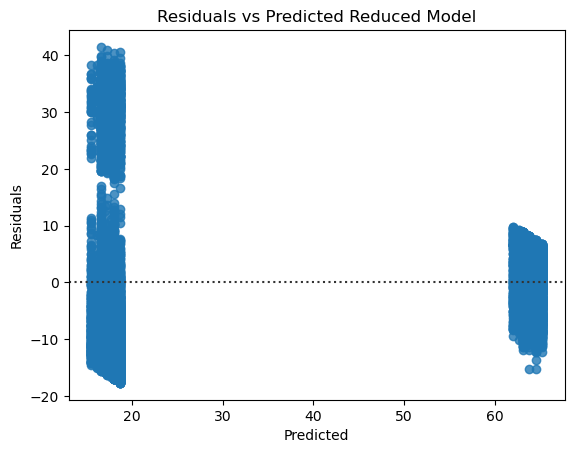

In [372]:
#Chceck for homoscedasticity
residuals2 = reduced_model.resid
predicted2 = reduced_model.predict(x2)
sns.residplot(x=predicted2, y=residuals2, data=reduced_model)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Reduced Model')
plt.show()

Text(0.5, 1.0, 'Q-Q Plot of residuals')

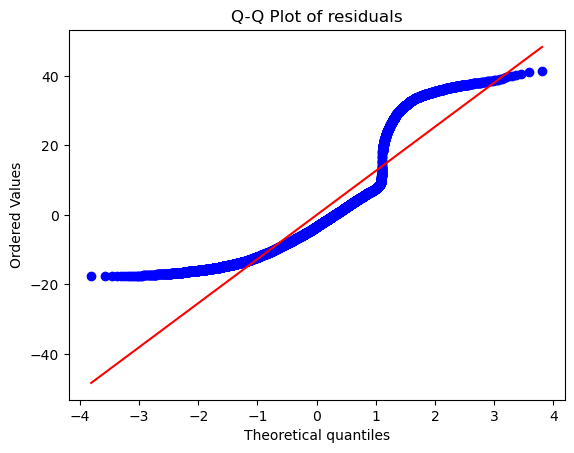

In [373]:
#QQ plot of residuals for normality 
stats.probplot(reduced_model.resid, dist='norm', plot=plt)
plt.title("Q-Q Plot of residuals")

In [374]:
#calculate residual standard error to determine how well it fits the dataset, the smaller the better
RES2 = np.sqrt(reduced_model.scale)
print('Residual Standard Error:', RES2)

Residual Standard Error: 13.79767053001007


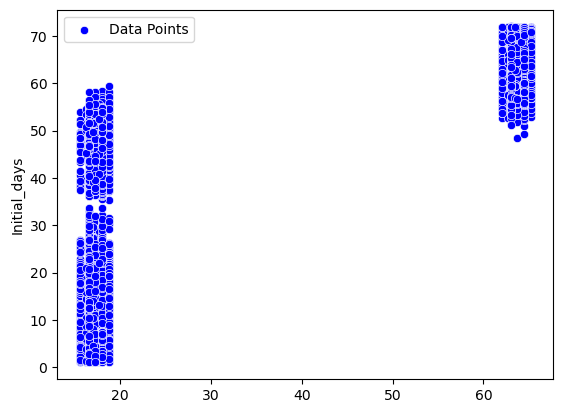

In [375]:
sns.scatterplot(x=predicted2, y=y2, label='Data Points', color='blue', marker='o')
plt.show()

In [376]:
#view coefficient 
print("Intercept:", reduced_model.params[0])  # Intercept (constant)
print(reduced_model.params[1:5])

Intercept: 18.028534708541176
ReAdmis                46.486815
Arthritis               0.679287
Emergency Admission    -1.474899
CT Scan                -1.026338
dtype: float64


In [377]:
#model evaluation metric 
r2 = reduced_model.rsquared
print("The accuracy of our model is {}%".format(r2 *100))

The accuracy of our model is 72.50727293626451%
